<a href="https://colab.research.google.com/github/kdy5213/AI-ExpertFW-Prj/blob/main/renttherunway_ML_hsb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
os.getcwd()
os.chdir("/content/drive/MyDrive/git_works")

In [3]:
pwd

'/content/drive/MyDrive/git_works'

In [4]:
rent_df = pd.read_csv("/content/drive/MyDrive/git_works/renttherunway_processing.csv")

In [5]:
rent_df.head(10)

,fit,user_id,bust_size,item_id,rating,rented_for,review_text,body_type,review_summary,category,height,size,age,review_date,weight_kg
0,fit,420272,34d,2260466,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,152.4,14,28.0,"April 20, 2016",62.142104
1,fit,273551,34b,153475,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,152.4,12,36.0,"June 18, 2013",59.874144
2,fit,909926,34c,126335,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,152.4,8,34.0,"February 12, 2014",61.234920
3,fit,151944,34b,616682,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,152.4,12,27.0,"September 26, 2016",65.770840
4,fit,734848,32b,364092,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,152.4,8,45.0,"April 30, 2016",62.595696
5,fit,336066,34c,568429,10.0,everyday,This dress is so sweet. I loved the print. The...,hourglass,LITERALLY THE CUTEST DRESS EVER,dress,152.4,4,27.0,"December 7, 2017",50.802304
6,fit,86661,34d+,130259,10.0,formal affair,Fit was great. Maybe a little tight under the ...,full bust,"Great dress, beautifully made. I received lot...",dress,152.4,8,65.0,"January 1, 2013",53.523856
7,fit,166228,36d,1729232,10.0,formal affair,I was nervous of it looking cheap when it arri...,full bust,Great for black tie event!,gown,152.4,21,27.0,"June 27, 2016",NaN
8,fit,154309,32b,1729232,10.0,formal affair,The dress was very flattering and fit perfectl...,petite,This dress was everything! It was perfect for ...,gown,152.4,1,33.0,"October 17, 2016",51.709488
9,small,185966,34b,1077123,8.0,party,The dress arrived with a small hole in the bea...,athletic,It was fun to wear a dress I wouldn't normally...,dress,152.4,12,33.0,"January 2, 2018",61.234920


In [ ]:
df = rent_df.copy()

In [ ]:
df.shape

(177897, 15)

In [ ]:
df.columns

Index(['fit', 'user_id', 'bust_size', 'item_id', 'rating', 'rented_for',
       'review_text', 'body_type', 'review_summary', 'category', 'height',
       'size', 'age', 'review_date', 'weight_kg'],
      dtype='object')

In [ ]:
df.drop(columns=['bust_size', 'review_text', 'review_summary','review_date'], inplace = True)

In [ ]:
df.head(10)

,fit,user_id,item_id,rating,rented_for,body_type,category,height,size,age,weight_kg
0,fit,420272,2260466,10.0,vacation,hourglass,romper,152.4,14,28.0,62.142104
1,fit,273551,153475,10.0,other,straight & narrow,gown,152.4,12,36.0,59.874144
2,fit,909926,126335,8.0,formal affair,pear,dress,152.4,8,34.0,61.234920
3,fit,151944,616682,10.0,wedding,athletic,gown,152.4,12,27.0,65.770840
4,fit,734848,364092,8.0,date,athletic,dress,152.4,8,45.0,62.595696
5,fit,336066,568429,10.0,everyday,hourglass,dress,152.4,4,27.0,50.802304
6,fit,86661,130259,10.0,formal affair,full bust,dress,152.4,8,65.0,53.523856
7,fit,166228,1729232,10.0,formal affair,full bust,gown,152.4,21,27.0,NaN
8,fit,154309,1729232,10.0,formal affair,petite,gown,152.4,1,33.0,51.709488
9,small,185966,1077123,8.0,party,athletic,dress,152.4,12,33.0,61.234920


In [ ]:
df.isnull().sum()

fit               0
user_id           0
item_id           0
rating           82
rented_for        0
body_type         0
category          0
height          548
size              0
age             405
weight_kg     24020
dtype: int64

In [ ]:
df['fit'].value_counts()

fit      131146
small     23690
large     23061
Name: fit, dtype: int64

In [ ]:
df.corr()

,user_id,item_id,rating,height,size,age,weight_kg
user_id,1.000000,-0.002935,-0.007814,-0.009523,0.005800,0.008996,0.002088
item_id,-0.002935,1.000000,-0.000632,0.000541,-0.043892,0.027089,-0.034177
rating,-0.007814,-0.000632,1.000000,-0.001569,-0.036646,-0.033024,-0.022303
height,-0.009523,0.000541,-0.001569,1.000000,0.081064,-0.008719,0.145213
size,0.005800,-0.043892,-0.036646,0.081064,1.000000,0.155669,0.849857
age,0.008996,0.027089,-0.033024,-0.008719,0.155669,1.000000,0.064953
weight_kg,0.002088,-0.034177,-0.022303,0.145213,0.849857,0.064953,1.000000


In [ ]:
df.dtypes

fit            object
user_id         int64
item_id         int64
rating        float64
rented_for     object
body_type      object
category       object
height        float64
size            int64
age           float64
weight_kg     float64
dtype: object

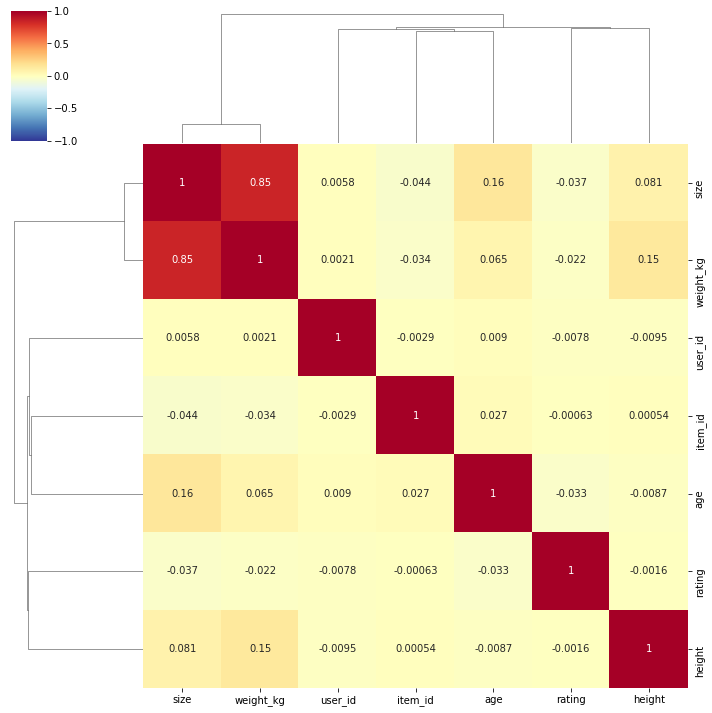

In [ ]:
sns.clustermap(df.corr(), 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
)

In [ ]:
df['user_id'] = df['user_id'].astype(str)
df['item_id'] = df['item_id'].astype(str)

In [ ]:
df.dtypes

fit            object
user_id        object
item_id        object
rating        float64
rented_for     object
body_type      object
category       object
height        float64
size            int64
age           float64
weight_kg     float64
dtype: object

In [ ]:
df.head(10)

,fit,user_id,item_id,rating,rented_for,body_type,category,height,size,age,weight_kg
0,fit,420272,2260466,10.0,vacation,hourglass,romper,152.4,14,28.0,62.142104
1,fit,273551,153475,10.0,other,straight & narrow,gown,152.4,12,36.0,59.874144
2,fit,909926,126335,8.0,formal affair,pear,dress,152.4,8,34.0,61.234920
3,fit,151944,616682,10.0,wedding,athletic,gown,152.4,12,27.0,65.770840
4,fit,734848,364092,8.0,date,athletic,dress,152.4,8,45.0,62.595696
5,fit,336066,568429,10.0,everyday,hourglass,dress,152.4,4,27.0,50.802304
6,fit,86661,130259,10.0,formal affair,full bust,dress,152.4,8,65.0,53.523856
7,fit,166228,1729232,10.0,formal affair,full bust,gown,152.4,21,27.0,NaN
8,fit,154309,1729232,10.0,formal affair,petite,gown,152.4,1,33.0,51.709488
9,small,185966,1077123,8.0,party,athletic,dress,152.4,12,33.0,61.234920


In [ ]:
def preprocessing(df, n):
    min_id = df['item_id'].value_counts() >= n
    min_id = min_id[min_id].index.to_list()
    df = df[df['item_id'].isin(min_id)]

    return df

In [ ]:
temp = df.copy()

In [ ]:

temp = preprocessing(temp, 100)
print(temp.shape)


(74012, 11)


In [ ]:
temp['item_id'].value_counts()

126335     2166
174086     1673
123793     1612
132738     1534
145906     1455
           ... 
429191      101
149655      101
227716      101
781825      100
1390469     100
Name: item_id, Length: 284, dtype: int64

In [ ]:
ratings = temp
ratings.shape

(74012, 11)

# 유사도 기반 추천

In [ ]:
# 피벗 테이블을 이용해 유저-아이템 매트릭스 구성
ratings_matrix = ratings.pivot_table('rating', index='user_id', columns='item_id')
ratings_matrix.head(3)
# fillna함수를 이용해 Nan처리
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix

item_id,1003076,1009845,1010328,1010926,1018841,1031440,1048184,1057664,1064397,1076484,...,870184,883661,903647,921642,943243,945880,948002,963476,985499,987052
user_id,,,,,,,,,,,,,,,,,,,,,
100011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100090,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ratings_matrix_T = ratings_matrix.transpose()
ratings_matrix_T

user_id,100011,100033,100042,100043,100090,100156,100177,100197,1002,100201,...,999891,99991,999910,999913,999922,999923,999952,999987,999994,999997
item_id,,,,,,,,,,,,,,,,,,,,,
1003076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1009845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1010328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1010926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1018841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
948002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
963476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 아이템-유저 매트릭스로부터 코사인 유사도 구하기
item_sim = cosine_similarity(ratings_matrix_T, ratings_matrix_T)

# cosine_similarity()로 반환된 넘파이 행렬에 아이템명을 매핑해 DataFrame으로 변환
item_sim_df = pd.DataFrame(data=item_sim, index=ratings_matrix.columns,
                          columns=ratings_matrix.columns)

print(item_sim_df.shape)
item_sim_df.head(10)

(284, 284)


item_id,1003076,1009845,1010328,1010926,1018841,1031440,1048184,1057664,1064397,1076484,...,870184,883661,903647,921642,943243,945880,948002,963476,985499,987052
item_id,,,,,,,,,,,,,,,,,,,,,
1003076,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005384,0.006279,0.012219,...,0.000000,0.000000,0.008611,0.006549,0.000000,0.000000,0.000000,0.005099,0.006230,0.009645
1009845,0.000000,1.000000,0.000000,0.014720,0.000000,0.000000,0.000000,0.007387,0.000000,0.001032,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.011096,0.000000,0.005597,0.000000,0.000000
1010328,0.000000,0.000000,1.000000,0.016845,0.004762,0.000000,0.006267,0.000000,0.000000,0.000000,...,0.009251,0.006654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1010926,0.000000,0.014720,0.016845,1.000000,0.000000,0.000000,0.000000,0.006838,0.000000,0.004775,...,0.009353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006331,0.000000
1018841,0.000000,0.000000,0.004762,0.000000,1.000000,0.000000,0.005037,0.004349,0.000000,0.002430,...,0.000000,0.000000,0.000000,0.003175,0.000000,0.000000,0.006326,0.007414,0.000000,0.000000
1031440,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.005221,0.007794,0.002917,...,0.000000,0.006420,0.000000,0.010162,0.010417,0.007842,0.000000,0.003955,0.008055,0.000000
1048184,0.000000,0.000000,0.006267,0.000000,0.005037,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.021921,0.000000,0.000000,0.000000,0.003046,0.015476,0.000000,0.004337,0.000000,0.032813
1057664,0.005384,0.007387,0.000000,0.006838,0.004349,0.005221,0.000000,1.000000,0.009222,0.002071,...,0.000000,0.000000,0.000000,0.000000,0.001096,0.001188,0.000000,0.000000,0.006100,0.000000
1064397,0.006279,0.000000,0.000000,0.000000,0.000000,0.007794,0.000000,0.009222,1.000000,0.003220,...,0.006307,0.000000,0.004720,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006608


In [ ]:
ratings_matrix.columns #item_id 

Index(['1003076', '1009845', '1010328', '1010926', '1018841', '1031440',
       '1048184', '1057664', '1064397', '1076484',
       ...
       '870184', '883661', '903647', '921642', '943243', '945880', '948002',
       '963476', '985499', '987052'],
      dtype='object', name='item_id', length=284)

In [ ]:
# 특정 item 과 유사도가 높은 item 상위 5개
item_sim_df['1010328'].sort_values(ascending=False)[:5]

item_id
1010328    1.000000
1010926    0.016845
432275     0.013549
1773356    0.010459
637670     0.010096
Name: 1010328, dtype: float64

In [ ]:
# 특정 item 과 유사도가 높은 item 상위 5개
item_sim_df['948002'].sort_values(ascending=False)[:5]

item_id
948002     1.000000
1229740    0.021885
943243     0.014343
1174307    0.011804
254960     0.010419
Name: 948002, dtype: float64

#개인화된 추천

In [ ]:
# ratings_arr.dot(item_sim_arr)는 평점 * 아이템  유사도
# ratings_arr는 사용자 u의 아이템 i와 가장 유사도가 높은 Top_N개 아이템에 대한 실제 평점 벡터
# item_sim_arr는 아이템 i와 가장 유사도가 높은 Top_N개 아이템의 유사도 벡터

def predict_rating(ratings_arr, item_sim_arr):
    ratings_pred = ratings_arr.dot(item_sim_arr) / np.array([np.abs(item_sim_arr).sum(axis=1)])
    return ratings_pred

# 개인화된 예측 평점 구하기
# 평점 value와 유사도 value만 뽑아서 대입
ratings_pred = predict_rating(ratings_matrix.values, item_sim_df.values)
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index=ratings_matrix.index,
                                  columns = ratings_matrix.columns)

# 개인별로 계산된 예측 평점
ratings_pred_matrix

item_id,1003076,1009845,1010328,1010926,1018841,1031440,1048184,1057664,1064397,1076484,...,870184,883661,903647,921642,943243,945880,948002,963476,985499,987052
user_id,,,,,,,,,,,,,,,,,,,,,
100011,0.000000,0.000000,0.000000,0.082421,0.000000,0.000000,0.093670,0.062269,0.093453,0.000000,...,0.000000,0.108764,0.190261,0.030892,0.000000,0.000000,0.049356,0.013542,0.166946,0.108415
100033,0.036609,0.000000,0.000000,0.021506,0.039541,0.029098,0.029904,0.073708,0.000000,0.061805,...,0.058945,0.000000,0.043732,0.024246,0.000000,0.051422,0.000000,0.022143,0.000000,0.043349
100042,0.000000,0.000000,0.037529,0.055967,0.030519,0.022368,0.000000,0.000000,0.000000,0.012857,...,0.065556,0.000000,0.000000,0.000000,0.056587,0.000000,0.038894,0.013339,0.041632,0.000000
100043,0.000000,0.033607,0.000000,0.000000,0.030055,0.000000,0.000000,0.026246,0.055923,0.000000,...,0.000000,0.000000,0.000000,0.021296,0.053496,0.000000,0.000000,0.054699,0.000000,0.025074
100090,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044628,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999923,0.000000,0.000000,0.000000,0.000000,0.000000,0.016297,0.025530,0.000000,0.024763,0.037354,...,0.000000,0.042161,0.000000,0.023575,0.000000,0.000000,0.000000,0.012918,0.025804,0.060696
999952,0.000000,0.000000,0.026155,0.000000,0.000000,0.012471,0.000000,0.011384,0.000000,0.007623,...,0.000000,0.000000,0.000000,0.011546,0.018127,0.000000,0.000000,0.008304,0.011848,0.000000
999987,0.101706,0.000000,0.020218,0.000000,0.077435,0.009640,0.000000,0.041798,0.023437,0.048225,...,0.024636,0.043644,0.000000,0.034362,0.000000,0.000000,0.000000,0.057962,0.034343,0.000000


In [ ]:
# 우리가 예측한 평점과 실제 평점간의 차이를 MSE로 계산
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    # 평점이 있는 실제 아이템만 추출
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

print('아이템 기반 모든 최근접 이웃 MSE: ', 
      get_mse(ratings_pred, ratings_matrix.values))

아이템 기반 모든 최근접 이웃 MSE:  14.070776493979125


# Top-N에 기반한 추천

In [ ]:
# 3개의 col까지만. 3개의 아이템에 대해서 유사도가 큰 5개 선택
top_n_items = [np.argsort(item_sim_df.values[:,3])[:-5:-1]]
top_n_items

[array([ 3, 11,  2, 40])]

In [ ]:
# 따라서 가장 비슷한 유사도를 가지는 아이템만 유사도 벡터로 사용
# 특정 아이템과 비슷한 유사도를 가지는 아이템 Top_N에 대해서만 적용

def predict_rating_topsim(ratings_arr, item_sim_arr, n=20):
    # 사용자-아이템 평점 행렬 크기만큼 0으로 채운 예측 행렬 초기화
    pred = np.zeros(ratings_arr.shape)

    # 사용자-아이템 평점 행렬의 아이템 개수만큼 루프
    for col in range(ratings_arr.shape[1]):
        # 유사도 행렬에서 유사도가 큰 순으로 n개의 데이터 행렬의 인덱스 반환
        top_n_items = [np.argsort(item_sim_arr[:, col])[:-n-1:-1]]
        # 개인화된 예측 평점 계산 : 각 col 아이템별(1개), 사용자들의 예측평점
        for row in range(ratings_arr.shape[0]):
            pred[row, col] = item_sim_arr[col,:][top_n_items].dot(
            ratings_arr[row, :][top_n_items].T)
            pred[row, col] /= np.sum(item_sim_arr[col,:][top_n_items])

    return pred

ratings_pred = predict_rating_topsim(ratings_matrix.values, item_sim_df.values, n=10)
print('아이템 기반 최근접 TOP-N 이웃 MSE: ', 
      get_mse(ratings_pred, ratings_matrix.values))

# 계산된 예측 평점 데이터는 DataFrame으로 재생성
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index=ratings_matrix.index,
                                  columns=ratings_matrix.columns)

ratings_pred_matrix

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which

아이템 기반 최근접 TOP-N 이웃 MSE:  1.1567503690220953


item_id,1003076,1009845,1010328,1010926,1018841,1031440,1048184,1057664,1064397,1076484,...,870184,883661,903647,921642,943243,945880,948002,963476,985499,987052
user_id,,,,,,,,,,,,,,,,,,,,,
100011,0.0,0.000000,0.0,0.10678,0.0,0.0,0.139326,0.000000,0.0,0.0,...,0.0,0.107876,0.235758,0.0,0.0,0.0,0.0,0.0,0.132606,0.0
100033,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
100042,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
100043,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
100090,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999923,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
999952,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
999987,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [ ]:
ratings_final = ratings_pred_matrix.copy()

item_id,1003076,1009845,1010328,1010926,1018841,1031440,1048184,1057664,1064397,1076484,...,870184,883661,903647,921642,943243,945880,948002,963476,985499,987052
user_id,,,,,,,,,,,,,,,,,,,,,
100011,0.0,0.000000,0.0,0.10678,0.0,0.0,0.139326,0.000000,0.0,0.0,...,0.0,0.107876,0.235758,0.0,0.0,0.0,0.0,0.0,0.132606,0.0
100033,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
100042,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
100043,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
100090,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999923,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
999952,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
999987,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [ ]:
ratings_pred_matrix['user_id'] = '100011'